In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from library import utils, config
import pickle
import cudf as cd
import cupy as cy

In [2]:
with open('./100 traders no price change/' + 'traderIDs_100_test_nopricechange' + '.pkl', 'rb') as f:
    traderIDs = pickle.load(f)

In [3]:
for i, portf in traderIDs.items():
    print(len(portf.stocks))
    print(len(portf.stocks)*len(portf.sharpeReal))
    print((portf.weightdata))
    print("\n")

14
28112
       ID  time  stock  weight
0   qwcpg   992      0    53.0
0   qwcpg   992      1     0.0
0   qwcpg   992      2    69.0
0   qwcpg   992      3     0.0
0   qwcpg   992      4     0.0
..    ...   ...    ...     ...
0   qwcpg  2999      9     0.0
0   qwcpg  2999     10   113.0
0   qwcpg  2999     11     0.0
0   qwcpg  2999     12    11.0
0   qwcpg  2999     13    16.0

[28224 rows x 4 columns]


13
26104
       ID  time  stock  weight
0   uzjcs   992      5     0.0
0   uzjcs   992      6     0.0
0   uzjcs   992      7    30.0
0   uzjcs   992      8    61.0
0   uzjcs   992      9     0.0
..    ...   ...    ...     ...
0   uzjcs  2999     13    11.0
0   uzjcs  2999     14    55.0
0   uzjcs  2999     15    21.0
0   uzjcs  2999     16    12.0
0   uzjcs  2999     17     0.0

[26208 rows x 4 columns]


17
34136
       ID  time  stock  weight
0   ytdkq   992      9     0.0
0   ytdkq   992     10     4.0
0   ytdkq   992     11     0.0
0   ytdkq   992     12     0.0
0   ytdkq   992   

[30240 rows x 4 columns]


14
28112
       ID  time  stock  weight
0   ujvap   992     89    21.0
0   ujvap   992     33     8.0
0   ujvap   992     58     6.0
0   ujvap   992     49    18.0
0   ujvap   992     12     7.0
..    ...   ...    ...     ...
0   ujvap  2999     56    30.0
0   ujvap  2999     78     0.0
0   ujvap  2999     42    36.0
0   ujvap  2999     41     0.0
0   ujvap  2999      8    40.0

[28224 rows x 4 columns]


13
26104
       ID  time  stock  weight
0   zyuik   992     69     0.0
0   zyuik   992     39     0.0
0   zyuik   992     91     2.0
0   zyuik   992     58     0.0
0   zyuik   992     26     0.0
..    ...   ...    ...     ...
0   zyuik  2999     89     9.0
0   zyuik  2999     57     4.0
0   zyuik  2999     16     3.0
0   zyuik  2999     20     0.0
0   zyuik  2999     72     0.0

[26208 rows x 4 columns]


17
34136
       ID  time  stock  weight
0   animz   992     57    35.0
0   animz   992     18     0.0
0   animz   992     71     0.0
0   animz   992     77

12
24096
       ID  time  stock  weight
0   ldjuy   992      6     0.0
0   ldjuy   992     18     0.0
0   ldjuy   992     13    44.0
0   ldjuy   992     24    81.0
0   ldjuy   992     96     0.0
..    ...   ...    ...     ...
0   ldjuy  2999     99     0.0
0   ldjuy  2999     32     0.0
0   ldjuy  2999     57    23.0
0   ldjuy  2999     88    75.0
0   ldjuy  2999     58     0.0

[24192 rows x 4 columns]


16
32128
       ID  time  stock  weight
0   ogilr   992     24    53.0
0   ogilr   992     96     0.0
0   ogilr   992     49    10.0
0   ogilr   992     77     0.0
0   ogilr   992     99     0.0
..    ...   ...    ...     ...
0   ogilr  2999     62     0.0
0   ogilr  2999      5     0.0
0   ogilr  2999      9     0.0
0   ogilr  2999     97     0.0
0   ogilr  2999     79     0.0

[32256 rows x 4 columns]


14
28112
       ID  time  stock  weight
0   tljbm   992     88     0.0
0   tljbm   992     58     0.0
0   tljbm   992     80     0.0
0   tljbm   992     10     7.0
0   tljbm   992   

In [34]:
def cosineSimP_cuda(time, portf1, portf2): #change from .stocks array to the weightdata arrays from objects
    """
    takes two portfolio objects and finds overlap between them
    so much slower with cuda b/c of passing cpu to gpu memory
    """
    overlapWeights = 0
    ptime1 = cd.DataFrame.from_pandas(portf1.weightdata[portf1.weightdata['time']==time])
    ptime2 = cd.DataFrame.from_pandas(portf2.weightdata[portf2.weightdata['time']==time])
    for i in portf1.stocks:
        if i in portf2.weights: # find the weights in portf1 and portf2
            pweight1 = int(ptime1[ptime1['stock']==i].weight[0])
            pweight2 = int(ptime2[ptime2['stock']==i].weight[0])
            overlapWeights += (pweight1 * pweight2) # actual weight calculation

    portf1weights = (ptime1.weight.values)
    portf2weights = (ptime2.weight.values)
    portf1Norm = float(cy.linalg.norm(portf1weights))
    portf2Norm = float(cy.linalg.norm(portf2weights))
#     print("done")
    if portf1.portfID == portf2.portfID:
        assert round(overlapWeights/(portf1Norm*portf2Norm)) == 1
#     print('calcing')
    return overlapWeights/(portf1Norm*portf2Norm)

In [27]:
portf1 = traderIDs['qwcpg']
# portf2 = traderIDs['uzjcs']

In [31]:
# ptime1 = portf.weightdata[portf.weightdata['time']==1034]
# ptime2 = portf2.weightdata[portf2.weightdata['time']==995]
# ptime1.weight.values
# # (ptime1[ptime1['stock']==0])

ptime1 = cd.DataFrame.from_pandas(portf1.weightdata[portf1.weightdata['time']==1000])
float(cy.linalg.norm(ptime1.weight.values))

148.63377812596974

In [37]:
mat = cy.zeros((100,100))

for t in range(1000,1100):
    mat2 = cy.zeros((100,100))
    x = 0
    y = 0
    for i, portf1 in traderIDs.items():
        y=0
        for j, portf2 in traderIDs.items():
            mat2[x,y] = cosineSimP_cuda(t,portf1,portf2)
            y += 1
        x += 1
        print(x)
    print('stacking...')
    cy.dstack((mat,mat2))
    print(t)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
stacking...
1000
1
2


TypeError: argument of type 'DataFrame' is not iterable

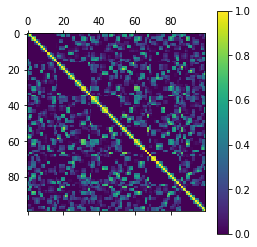

In [124]:
plt.matshow(mat)
plt.colorbar()

In [88]:
cosineSimP(1003,portf2,portf2)


0.03635478373772621